In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load data

In [100]:
features_exp_meth = pd.read_csv("data/features_exp_meth.tsv", sep = "\t")
features_exp_meth.head()

,ENSG00000162670.11,ENSG00000250579.2,ENSG00000249001.5,ENSG00000106038.13,ENSG00000229876.1,ENSG00000179083.6,ENSG00000146755.11,ENSG00000029559.7,ENSG00000159184.8,ENSG00000250284.3,...,cg06752054,cg12544663,cg22509384,cg26315617,cg10065209,cg02144924,cg22730626,cg01973908,sample_type,vital_status
TCGA-ZP-A9CY-01,5,93,1,0,1,1,17,4,0,0,...,0.057347,0.401574,0.508229,0.359991,0.846454,0.385705,0.441197,0.304071,Primary Tumor,Alive
TCGA-DD-AAVZ-01,0,72,0,2,0,0,2444,0,0,0,...,0.028248,0.977648,0.981029,0.975435,0.643069,0.975916,0.975635,0.930332,Primary Tumor,Alive
TCGA-DD-A1EC-11,0,0,0,0,0,1,19,0,2,0,...,0.646390,0.974809,0.976811,0.982140,0.975125,0.970166,0.984650,0.920895,Solid Tissue Normal,Alive
TCGA-DD-A1EC-01,0,0,0,0,0,0,2,0,0,0,...,0.038572,0.973979,0.965864,0.857735,0.548383,0.941636,0.611837,0.411359,Primary Tumor,Alive
TCGA-G3-A25T-01,0,49,0,15,0,3,56,409,123,0,...,0.793002,0.982413,0.979154,0.977417,0.985435,0.964828,0.975571,0.939466,Primary Tumor,Alive


In [167]:
features_complete = pd.read_csv("data/features_complete.tsv", sep = "\t")
features_complete.head()

,ENSG00000162670.11,ENSG00000250579.2,ENSG00000249001.5,ENSG00000106038.13,ENSG00000229876.1,ENSG00000179083.6,ENSG00000146755.11,ENSG00000029559.7,ENSG00000159184.8,ENSG00000250284.3,...,chr19:33723706-33837231,chr20:13964029-16252980,chr20:49017144-49057135,chr20:60328006-63025520,chr22:28314430-29085838,chr22:44205320-51304566,sample_type,vital_status,days_to_death,ajcc_pathologic_stage
TCGA-ZP-A9CY-01,5,93,1,0,1,1,17,4,0,0,...,0,0,0,0,0,0,Primary Tumor,Alive,NaN,NaN
TCGA-DD-AAVZ-01,0,72,0,2,0,0,2444,0,0,0,...,0,0,0,0,0,0,Primary Tumor,Alive,NaN,Stage I
TCGA-DD-A1EC-01,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,Primary Tumor,Alive,NaN,Stage I
TCGA-G3-A25T-01,0,49,0,15,0,3,56,409,123,0,...,1,0,0,0,1,1,Primary Tumor,Alive,NaN,Stage III
TCGA-CC-A8HT-01,156,1,65,8,196,558,153,5,13,36,...,0,0,0,0,0,0,Primary Tumor,Dead,140.0,Stage III


# Predicting tissue type from DEGs and DMLs (healthy vs. cancer)

In [101]:
##highly imbalanced > subsample?
features_exp_meth.loc[:,'sample_type'].value_counts()

Primary Tumor          371
Solid Tissue Normal     41
Name: sample_type, dtype: int64

## Hyperparameter optimization (10-fold cross validation)

In [48]:
n_estimators = range(50,501,50) #list [start:stop:step], np arange
max_features = np.arange(0.1,0.4,0.05)
max_samples = np.arange(0.1,0.4,0.05)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
               'class_weight': ['balanced', 'balanced_subsample']
              }

In [53]:
rf = RandomForestClassifier()
rf_random_tissue = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=41, n_jobs = -1)
rf_random_tissue.fit(features_exp_meth.drop(['sample_type', 'vital_status'], axis = 1), features_exp_meth.loc[:,'sample_type'])
rf_random_tissue.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 250,
 'max_samples': 0.40000000000000013,
 'max_features': 0.1,
 'class_weight': 'balanced_subsample'}

## Train and test model with best parameters

In [186]:
##predict sample type using expression and methylation data

X = features_exp_meth.drop(['sample_type', 'vital_status'], axis = 1)
y = features_exp_meth.loc[:,'sample_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

clf_type = RandomForestClassifier(n_estimators = 250,  
                             max_samples =  0.3500000000000001, 
                             max_features = 0.1,
                             class_weight = 'balanced_subsample',
                             random_state=0)

clf_type.fit(X_train, y_train)

y_pred_train = clf_type.predict(X_train)
y_pred_test = clf_type.predict(X_test)

print("classification report on the train set: \n" ,classification_report(y_train, y_pred_train))
print("classification report on the test set: \n" ,classification_report(y_test, y_pred_test))

classification report on the train set: 
                      precision    recall  f1-score   support

      Primary Tumor       1.00      1.00      1.00       250
Solid Tissue Normal       0.96      0.96      0.96        26

           accuracy                           0.99       276
          macro avg       0.98      0.98      0.98       276
       weighted avg       0.99      0.99      0.99       276

classification report on the test set: 
                      precision    recall  f1-score   support

      Primary Tumor       0.99      1.00      1.00       121
Solid Tissue Normal       1.00      0.93      0.97        15

           accuracy                           0.99       136
          macro avg       1.00      0.97      0.98       136
       weighted avg       0.99      0.99      0.99       136



confusion matrix on the train set: 



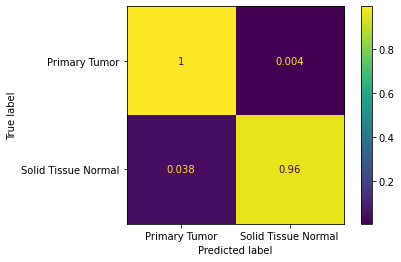

In [192]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train, normalize = "true"), display_labels=clf_type.classes_).plot()

confusion matrix on the train set: 



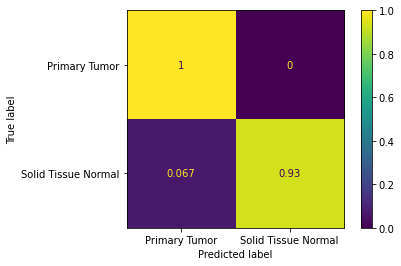

In [193]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test, normalize = "true"), display_labels=clf_type.classes_).plot()

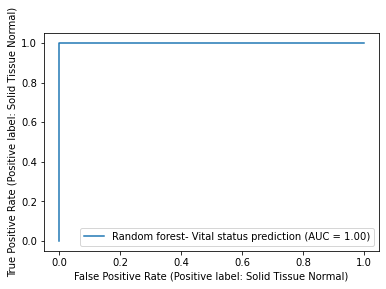

In [103]:
RocCurveDisplay.from_estimator(clf_type,X_test, y_test, name = 'Random forest- Vital status prediction')

In [105]:
data=pd.DataFrame({'Feature': X_train.columns, 'Importance': clf_type.feature_importances_})
data=data.sort_values('Importance').iloc[::-1]
data.head(30)

,Feature,Importance
200,ENSG00000104938.18,0.062647
210,ENSG00000145708.11,0.050238
204,ENSG00000160339.16,0.047146
206,ENSG00000136011.15,0.047085
209,ENSG00000164619.10,0.037987
207,ENSG00000263761.3,0.033936
216,ENSG00000184374.3,0.030412
230,ENSG00000114812.13,0.030362
205,ENSG00000019169.10,0.030262
215,ENSG00000142748.13,0.029968


(array([815.,   7.,   1.,   0.,   0.,  17.,  18.,   1.,   0.,   0.,   0.,
          3.,   9.,   1.,   0.,   0.,   0.,   1.,   5.,   0.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,
          0.,   0.,   0.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00062647, 0.00125293, 0.0018794 , 0.00250586,
        0.00313233, 0.0037588 , 0.00438526, 0.00501173, 0.00563819,
        0.00626466, 0.00689113, 0.00751759, 0.00814406, 0.00877052,
        0.00939699, 0.01002346, 0.01064992, 0.01127639, 0.01190285,
        0.01252932, 0.01315579, 0.01378225, 0.

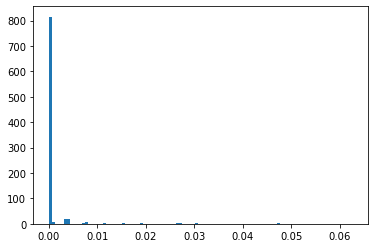

In [62]:
##many features are not important
plt.hist(data.Importance, bins = 100)

In [57]:
data.to_csv("data/feature_importance.csv")

## Reduce number of features

In [197]:
features_exp_meth_reduced = features_exp_meth.loc[:,data.head(100).Feature.values]
features_exp_meth_reduced['sample_type'] = features_exp_meth.sample_type

In [198]:
features_exp_meth_reduced.head()

,ENSG00000104938.18,ENSG00000145708.11,ENSG00000160339.16,ENSG00000136011.15,ENSG00000164619.10,ENSG00000263761.3,ENSG00000184374.3,ENSG00000114812.13,ENSG00000019169.10,ENSG00000142748.13,...,ENSG00000082684.16,ENSG00000255501.3,ENSG00000112164.6,ENSG00000182798.10,cg24710938,ENSG00000249173.6,cg22274473,cg23263911,cg10732560,sample_type
TCGA-ZP-A9CY-01,61,657,399,191,76,462,674,298,406,1026,...,76,6,8,7,0.645364,609,0.738885,0.419994,0.844969,Primary Tumor
TCGA-DD-AAVZ-01,0,25,0,16,7,2,202,70,0,41,...,105,0,144,0,0.986564,98,0.653175,0.976523,0.651784,Primary Tumor
TCGA-DD-A1EC-11,2735,3212,2233,2311,522,2642,3930,1672,6770,3762,...,76,0,0,1,0.975435,3515,0.951356,0.979182,0.980733,Solid Tissue Normal
TCGA-DD-A1EC-01,2,46,2,6,110,0,34,12,164,855,...,146,0,6,1,0.733936,0,0.626723,0.631129,0.938304,Primary Tumor
TCGA-G3-A25T-01,18,345,157,49,93,529,303,119,362,3217,...,379,0,10,0,0.987416,79,0.956830,0.558836,0.940923,Primary Tumor


In [94]:
rf = RandomForestClassifier()
rf_random_tissue = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=41, n_jobs = -1)
rf_random_tissue.fit(features_exp_meth_reduced.drop(['sample_type'], axis = 1), features_exp_meth_reduced.loc[:,'sample_type'])
rf_random_tissue.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 200,
 'max_samples': 0.40000000000000013,
 'max_features': 0.1,
 'class_weight': 'balanced_subsample'}

In [199]:
##predict sample type using expression and methylation data

X = features_exp_meth_reduced.drop(['sample_type'], axis = 1)
y = features_exp_meth_reduced.loc[:,'sample_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

clf_type_red = RandomForestClassifier(n_estimators = 200,  
                             max_samples =  0.4, 
                             max_features = 0.1,
                             class_weight = 'balanced_subsample',
                             random_state=0)

clf_type_red.fit(X_train, y_train)

y_pred_train = clf_type_red.predict(X_train)
y_pred_test = clf_type_red.predict(X_test)

print("classification report on the train set: \n" ,classification_report(y_train, y_pred_train))
print("classification report on the test set: \n" ,classification_report(y_test, y_pred_test))

classification report on the train set: 
                      precision    recall  f1-score   support

      Primary Tumor       1.00      1.00      1.00       250
Solid Tissue Normal       0.96      0.96      0.96        26

           accuracy                           0.99       276
          macro avg       0.98      0.98      0.98       276
       weighted avg       0.99      0.99      0.99       276

classification report on the test set: 
                      precision    recall  f1-score   support

      Primary Tumor       0.99      1.00      1.00       121
Solid Tissue Normal       1.00      0.93      0.97        15

           accuracy                           0.99       136
          macro avg       1.00      0.97      0.98       136
       weighted avg       0.99      0.99      0.99       136



confusion matrix on the train set: 



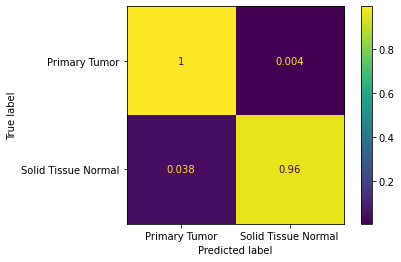

In [201]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train, normalize = "true"), display_labels=clf_type_red.classes_).plot()

confusion matrix on the train set: 



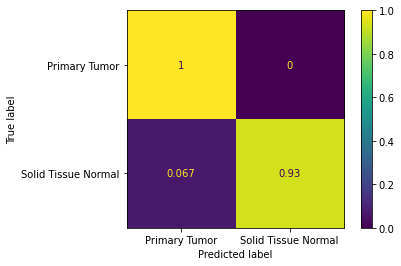

In [200]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test, normalize = "true"), display_labels=clf_type_red.classes_).plot()

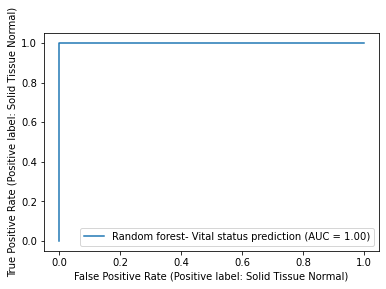

In [202]:
RocCurveDisplay.from_estimator(clf_type_red,X_test, y_test, name = 'Random forest- Vital status prediction')

# Predicting cancer stage from DEGs, DMLs and CNVs (stage I vs. II vs. III)

In [203]:
features_complete.loc[:,'ajcc_pathologic_stage'].value_counts()

Stage I      169
Stage II      86
Stage III     80
Stage IV       5
Name: ajcc_pathologic_stage, dtype: int64

In [204]:
features_complete_stage = features_complete[~features_complete.loc[:,'ajcc_pathologic_stage'].isnull()]
features_complete_stage = features_complete_stage[features_complete_stage.ajcc_pathologic_stage != "Stage IV"]
features_complete_stage.head()

,ENSG00000162670.11,ENSG00000250579.2,ENSG00000249001.5,ENSG00000106038.13,ENSG00000229876.1,ENSG00000179083.6,ENSG00000146755.11,ENSG00000029559.7,ENSG00000159184.8,ENSG00000250284.3,...,chr19:33723706-33837231,chr20:13964029-16252980,chr20:49017144-49057135,chr20:60328006-63025520,chr22:28314430-29085838,chr22:44205320-51304566,sample_type,vital_status,days_to_death,ajcc_pathologic_stage
TCGA-DD-AAVZ-01,0,72,0,2,0,0,2444,0,0,0,...,0,0,0,0,0,0,Primary Tumor,Alive,NaN,Stage I
TCGA-DD-A1EC-01,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,Primary Tumor,Alive,NaN,Stage I
TCGA-G3-A25T-01,0,49,0,15,0,3,56,409,123,0,...,1,0,0,0,1,1,Primary Tumor,Alive,NaN,Stage III
TCGA-CC-A8HT-01,156,1,65,8,196,558,153,5,13,36,...,0,0,0,0,0,0,Primary Tumor,Dead,140.0,Stage III
TCGA-K7-A5RG-01,44,485,0,1,5,457,10,1,88,42,...,0,0,0,0,1,1,Primary Tumor,Alive,NaN,Stage I


In [205]:
features_complete_stage.loc[:,'ajcc_pathologic_stage'].value_counts()

Stage I      169
Stage II      86
Stage III     80
Name: ajcc_pathologic_stage, dtype: int64

## Hyperparameter optimization (10-fold cross validation)

In [171]:
rf = RandomForestClassifier()
rf_random_stage = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=41, n_jobs = -1)
rf_random_stage.fit(features_complete_stage.drop(["sample_type","vital_status","days_to_death", 'ajcc_pathologic_stage'], axis = 1), features_complete_stage.loc[:,'ajcc_pathologic_stage'])
rf_random_stage.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 300,
 'max_samples': 0.3500000000000001,
 'max_features': 0.40000000000000013,
 'class_weight': 'balanced_subsample'}

In [217]:
##predict sample type using expression, methylation and cnv data

X = features_complete_stage.drop(["sample_type","vital_status","days_to_death", 'ajcc_pathologic_stage'], axis = 1)
y = features_complete_stage.loc[:,'ajcc_pathologic_stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

clf_stage = RandomForestClassifier(n_estimators = 200,  
                             max_samples =  0.35, 
                             max_features = 0.1,
                             class_weight = 'balanced_subsample',
                             random_state=0)

clf_stage.fit(X_train, y_train)

y_pred_train = clf_stage.predict(X_train)
y_pred_test = clf_stage.predict(X_test)

print("classification report on the train set: \n" ,classification_report(y_train, y_pred_train))
print("classification report on the test set: \n" ,classification_report(y_test, y_pred_test))

classification report on the train set: 
               precision    recall  f1-score   support

     Stage I       0.83      1.00      0.91       119
    Stage II       1.00      0.77      0.87        56
   Stage III       1.00      0.78      0.87        49

    accuracy                           0.89       224
   macro avg       0.94      0.85      0.88       224
weighted avg       0.91      0.89      0.89       224

classification report on the test set: 
               precision    recall  f1-score   support

     Stage I       0.47      0.94      0.63        50
    Stage II       0.33      0.03      0.06        30
   Stage III       0.56      0.16      0.25        31

    accuracy                           0.48       111
   macro avg       0.45      0.38      0.31       111
weighted avg       0.46      0.48      0.37       111



confusion matrix on the train set: 



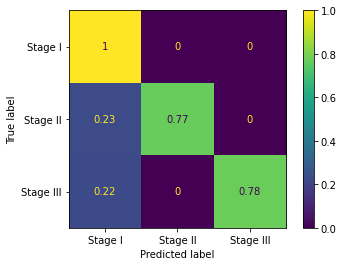

In [214]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train, normalize = "true"), display_labels=clf_stage.classes_).plot()

confusion matrix on the test set: 



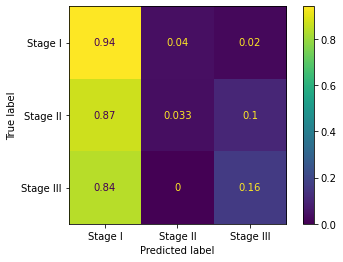

In [215]:
print("confusion matrix on the test set: \n", )
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test, normalize = "true"), display_labels=clf_stage.classes_).plot()

# Predicting vital status from DEGs, DMLs and CNVs

In [229]:
features_complete.loc[:,'sample_type'].value_counts()

Primary Tumor    364
Name: sample_type, dtype: int64

In [230]:
##still imbalanced
features_complete.loc[:,'vital_status'].value_counts()

Alive           236
Dead            127
Not Reported      1
Name: vital_status, dtype: int64

In [231]:
##remove rows with vital status not available
features_complete = features_complete.drop(features_complete[features_complete.vital_status=='Not Reported'].index)

In [232]:
features_complete.loc[:,'vital_status'].value_counts()

Alive    236
Dead     127
Name: vital_status, dtype: int64

## Hyperparameter optimization (10-fold cross validation)

In [28]:
rf_random_status.fit(features_complete.drop(['days_to_death', 'vital_status'], axis = 1), features_complete.loc[:,'vital_status'])
rf_random_status.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 100,
 'max_samples': 0.20000000000000004,
 'max_features': 0.3500000000000001,
 'class_weight': 'balanced_subsample'}

In [233]:
features_complete.head()

,ENSG00000162670.11,ENSG00000250579.2,ENSG00000249001.5,ENSG00000106038.13,ENSG00000229876.1,ENSG00000179083.6,ENSG00000146755.11,ENSG00000029559.7,ENSG00000159184.8,ENSG00000250284.3,...,chr19:33723706-33837231,chr20:13964029-16252980,chr20:49017144-49057135,chr20:60328006-63025520,chr22:28314430-29085838,chr22:44205320-51304566,sample_type,vital_status,days_to_death,ajcc_pathologic_stage
TCGA-ZP-A9CY-01,5,93,1,0,1,1,17,4,0,0,...,0,0,0,0,0,0,Primary Tumor,Alive,NaN,NaN
TCGA-DD-AAVZ-01,0,72,0,2,0,0,2444,0,0,0,...,0,0,0,0,0,0,Primary Tumor,Alive,NaN,Stage I
TCGA-DD-A1EC-01,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,Primary Tumor,Alive,NaN,Stage I
TCGA-G3-A25T-01,0,49,0,15,0,3,56,409,123,0,...,1,0,0,0,1,1,Primary Tumor,Alive,NaN,Stage III
TCGA-CC-A8HT-01,156,1,65,8,196,558,153,5,13,36,...,0,0,0,0,0,0,Primary Tumor,Dead,140.0,Stage III


In [234]:
##predict vital_status using expression, methylation and cnv data
X = features_complete.drop(['sample_type','vital_status', 'days_to_death', 'ajcc_pathologic_stage'], axis = 1)
y = features_complete.loc[:,'vital_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

clf_status = RandomForestClassifier(n_estimators = 100,  
                             max_samples =  0.2, 
                             max_features = 0.35,
                             class_weight = 'balanced_subsample',
                             random_state=0)

clf_status.fit(X_train, y_train)

y_pred_train = clf_status.predict(X_train)
y_pred_test = clf_status.predict(X_test)

print("classification report on the train set: \n" ,classification_report(y_train, y_pred_train))
print("classification report on the test set: \n" ,classification_report(y_test, y_pred_test))

classification report on the train set: 
               precision    recall  f1-score   support

       Alive       0.75      1.00      0.86       159
        Dead       1.00      0.38      0.55        84

    accuracy                           0.79       243
   macro avg       0.88      0.69      0.71       243
weighted avg       0.84      0.79      0.75       243

classification report on the test set: 
               precision    recall  f1-score   support

       Alive       0.65      0.99      0.78        77
        Dead       0.67      0.05      0.09        43

    accuracy                           0.65       120
   macro avg       0.66      0.52      0.44       120
weighted avg       0.66      0.65      0.53       120



confusion matrix on the train set: 



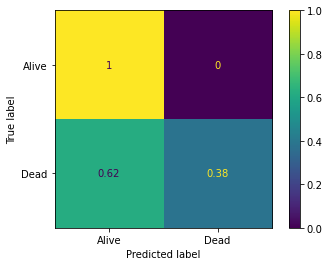

In [235]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train, normalize = "true"), display_labels=clf_status.classes_).plot()

confusion matrix on the train set: 



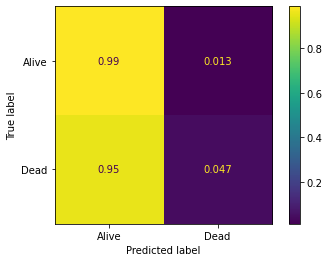

In [236]:
print("confusion matrix on the train set: \n")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test, normalize = "true"), display_labels=clf_status.classes_).plot()

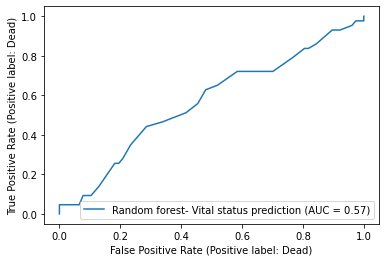

In [237]:
RocCurveDisplay.from_estimator(clf_status,X_test, y_test, name = 'Random forest- Vital status prediction')